<a href="https://colab.research.google.com/github/junsung2001/deep/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [24]:
from tensorflow.keras.models import Sequential #keras 라이브러리에 models클래스에서 Sequential이라는 함수 불러오기
from tensorflow.keras.layers import Dense, Input #keras라이브러리에 layers 클래스에서 Dense라는 함수 불러오기
from keras.utils import plot_model #데이터 전처리를 위한 함수 불러오기
import numpy as np
from sklearn.model_selection import train_test_split

### 2. 데이터 준비

In [26]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",") #데이터
X = Data_set[:,0:16] #환자의 상태를 기록하는 부분은 X로
y = Data_set[:,16] # 수술 후 환자의 사망/생존 여부는 Y로 지정함!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


fatal: destination path 'data' already exists and is not an empty directory.


In [6]:
import pandas as pd
df = pd.read_csv('./data/ThoraricSurgery3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


### 3. 구조 결정

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

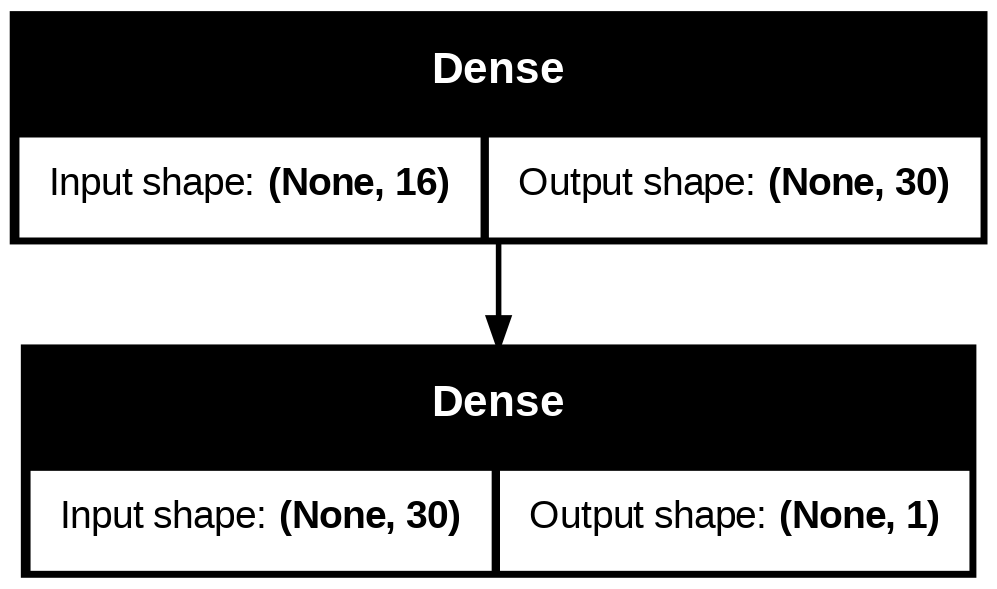

In [14]:
#model = Sequential([
 # Input(shape=(16,))
  #,Dense(30, activation='relu')
  #,Dense(1, activation= 'sigmoid') #sigmoid는 방식
 #model=설정

# model.add(Dense(30, input_shape=(16,), activation='relu'))
# model.add(Dense(1, activation= 'sigmoid'))

model = Sequential()
model.add(Input(shape=(16,))) #16개의 특성을 가짐
model.add(Dense(30,activation='relu')) #relu를 사용하고 뉴런은 30개인 은닉층 추가
model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True)

### 4. 모델 실행

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #model이라는 설정으로 compile실행!
history=model.fit(X_train, y_train, epochs=5, batch_size=16) #5번 왕복 하며 16개의 데이터를 사용한다


Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8219 - loss: 0.4590
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8807 - loss: 0.3445
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8753 - loss: 0.3599
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8502 - loss: 0.3992
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8745 - loss: 0.3758


In [18]:
history.history

{'accuracy': [0.8553191423416138,
  0.8510638475418091,
  0.8531914949417114,
  0.8531914949417114,
  0.848936140537262],
 'loss': [0.41936245560646057,
  0.4373718202114105,
  0.4120774567127228,
  0.41306212544441223,
  0.412886381149292]}

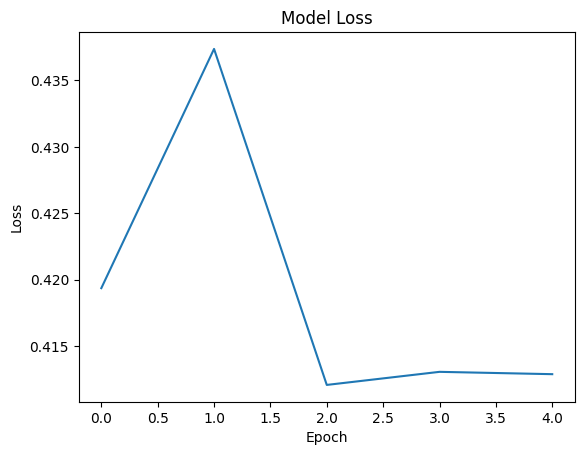

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) #loss를 가지고 그래프를 그림
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

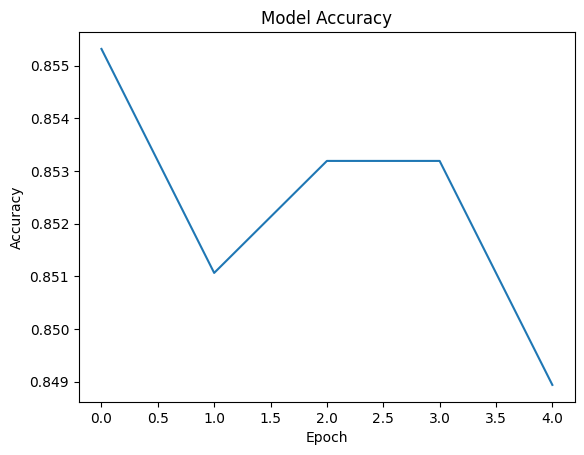

In [20]:
plt.plot(history.history['accuracy']) #accuracy를 가지고 그래프를 그림
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8027 - loss: 0.4704 
Test Loss: 0.4816
Test Accuracy: 0.8085


문제 1 : train, test 데이터셋을 나누는 코드를 추가하고 다시 실행해보세요

24번째 셀의 evaluate()의 파라미터값도 추가한 변수 중 테스트 데이터셋으로 변경


문제 2: model2라는 변수에 아래 조건을 만족하는 모델을 저장하고 학습해서 결과를 비교해보세요

입력층 동일
은닉층1 : 64개의 뉴런, 활성화함수 ReLU 사용
은닉층2 : 32개의 뉴런, 활성화함수 ReLU 사용
출력층 동일

문제1

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7974 - loss: 0.4416
Test Loss: 0.4479
Test Accuracy: 0.7979


문제 2

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

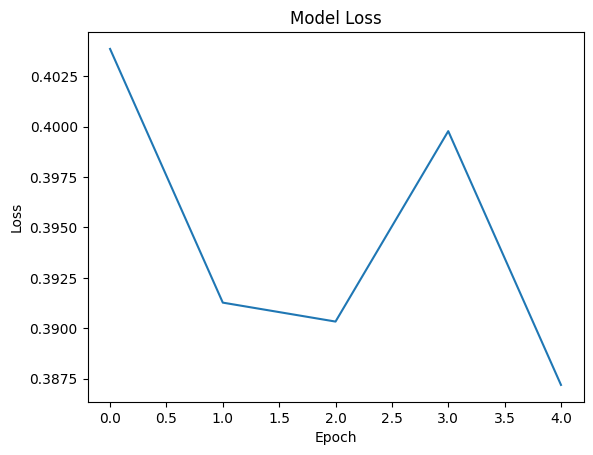

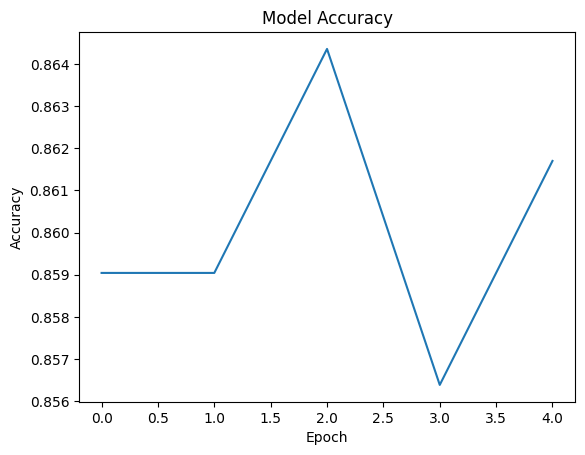

In [35]:
model2 = Sequential()
model2.add(Input(shape=(16,)))                 # 특성 16개인 입력층
model2.add(Dense(64, activation='relu'))       # relu를 사용하고 뉴런은 64개인 은닉층 추가
model2.add(Dense(32, activation='relu'))       # relu를 사용하고 뉴런은 32개인 은닉층 추가
model2.add(Dense(1, activation='sigmoid'))     # 시그모이드로 출력

model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #model이라는 설정으로 compile실행!


plt.plot(history.history['loss']) #loss를 가지고 그래프를 그림
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

plt.plot(history.history['accuracy']) #accuracy를 가지고 그래프를 그림
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()